In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import keras
warnings.simplefilter("ignore")

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/562Final/Ford_data.xlsx")
df=df.dropna(subset=["class","text"]).reset_index(drop=True)
df.head()

,class,text
0,Pos,Some of you might have read my previous post ...
1,Pos,I bought my new 1999 Ford Taurus just two mon...
2,Pos,My first car was a Ford One of those old cl...
3,Pos,Last spring we got a new car a 1999 ford tau...
4,Pos,Recently I bought a used 99 Ford Taurus The...


In [ ]:
from sklearn.utils import shuffle
df2 = shuffle(df)
df2.loc[df["class"] == "Pos", "class"] = 2
df2.loc[df["class"] == "Neg", "class"] = 1
df2['class']=df2['class'].to_list()
df2.head()

,class,text
738,2,The F 250 is a great work truck its also a g...
715,2,Dear S U V shoppers Your reading my review ...
362,1,I am going to start this off by telling you t...
4,2,Recently I bought a used 99 Ford Taurus The...
733,2,I bought this vehicle along with my husband ...


In [ ]:
df2['class'].value_counts()

2    691
1    691
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
rev=df2["text"]
target=df2["class"]
x_train, x_test, y_train, y_test = train_test_split(rev,target,test_size=0.1,random_state=0,stratify=target)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Number of words to consider as features
max_features = 10000

# Cut texts after this number of words 
maxlen = 300

#Tokenizing
tokenizer=Tokenizer(max_features,oov_token="<?>")
tokenizer.fit_on_texts(x_train)
X_train=tokenizer.texts_to_sequences(x_train)
X_test=tokenizer.texts_to_sequences(x_test)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x text length)')
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

1243 train sequences
139 test sequences
Pad sequences (samples x text length)
X_train shape: (1243, 300)
X_test shape: (139, 300)


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,45,1578,1671,6,3,162,1671,11,24,346,...,1429,3923,21,11,24,607,12,53,837,177
1,3391,324,5,242,3,1297,11,14,53,2209,...,57,45,282,845,66,693,32,7,24,6005
2,2,222,724,1408,695,79,339,694,9,2,...,9507,7277,7278,9508,9509,7279,7280,7281,7282,7283
3,0,0,0,0,0,0,0,0,0,0,...,3628,226,3040,39,77,54,188,584,63,63
4,2,59,71,424,43,7,27,148,74,1480,...,599,12,3,9522,43,3,7290,753,38,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,22,6,20,6,54,11,1561,31,296,3,...,16,55,19,492,49,2005,18,167,2,734
1239,19,282,4,27,55,27,2,312,808,11,...,35,4,44,20,3,3791,6,1696,7,15
1240,0,0,0,0,0,0,0,0,0,0,...,88,132,64,381,12,3339,519,1285,63,63
1241,11,271,265,15,2,53,5,569,360,12,...,250,452,44,18,54,290,43,11,21,23


In [ ]:
from keras import layers
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Bidirectional, Dense

model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(Conv1D(64,5,activation="relu"))
model.add(MaxPooling1D(3))
model.add(LSTM(32,return_sequences=True,dropout=0.2,recurrent_dropout=0.3))
model.add(LSTM(16,dropout=0.2,recurrent_dropout=0.3))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           640000    
                                                                 
 conv1d (Conv1D)             (None, 296, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 98, 32)            12416     
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                        

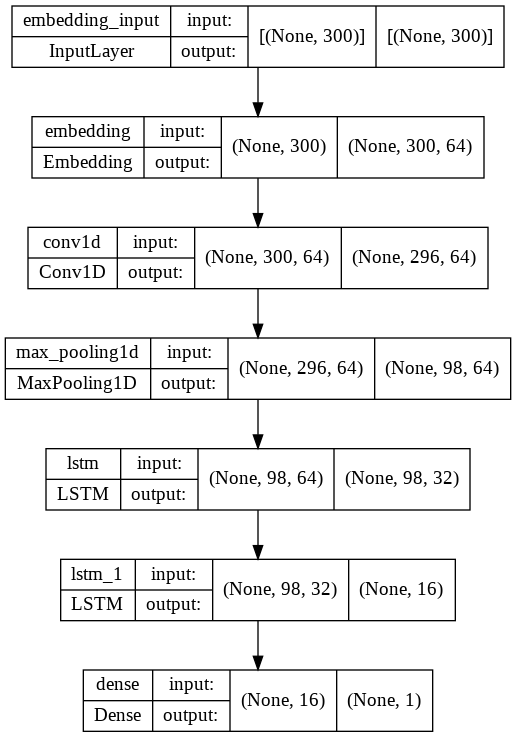

In [ ]:
import tensorflow as tf
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
from keras.callbacks import EarlyStopping
#ES=EarlyStopping(patience=3)
model.compile(optimizer='adam', loss='mae', metrics='mape') 
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                   validation_data=(X_test,y_test))
                    #callbacks=ES)

#keras.backend.clear_session()
#del model

Epoch 1/10
39/39 [==============================] - 19s 279ms/step - loss: 0.7278 - mape: 54.2799 - val_loss: 0.4976 - val_mape: 45.1747
Epoch 2/10
39/39 [==============================] - 10s 262ms/step - loss: 0.4830 - mape: 42.9519 - val_loss: 0.4741 - val_mape: 40.7292
Epoch 3/10
39/39 [==============================] - 10s 260ms/step - loss: 0.3583 - mape: 27.1714 - val_loss: 0.3618 - val_mape: 28.4589
Epoch 4/10
39/39 [==============================] - 11s 278ms/step - loss: 0.2225 - mape: 17.6383 - val_loss: 0.3541 - val_mape: 28.5446
Epoch 5/10
39/39 [==============================] - 10s 259ms/step - loss: 0.1502 - mape: 11.7317 - val_loss: 0.3186 - val_mape: 22.8865
Epoch 6/10
39/39 [==============================] - 10s 259ms/step - loss: 0.0926 - mape: 7.0950 - val_loss: 0.3313 - val_mape: 26.3556
Epoch 7/10
39/39 [==============================] - 10s 253ms/step - loss: 0.0630 - mape: 4.8629 - val_loss: 0.3263 - val_mape: 25.2122
Epoch 8/10
39/39 [=========================

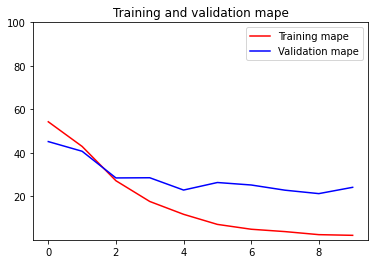

In [ ]:
mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

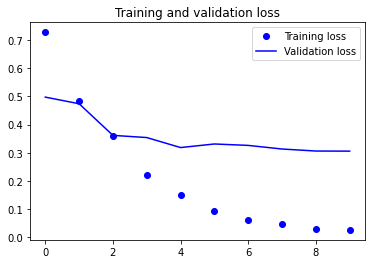

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model
model.save('model_file.h5')
my_model=load_model('model_file.h5')

In [ ]:
model.predict(X_test)